# Zonal tracers with some slow restoring

In [10]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig

In [11]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km/run_multi_tracer_restored_all_tracers/'

# brief comment on how often was the model data saved 
# the mode outputs fields every 5 days, averages are also
# calculated over 5 days (*this creates stupid amounts of 
# unnecessary data, and was definitely a terrible idea in hidsight).
# 

iters = range(10473120, 10473120+518400*4, 1440)
model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 'ETAtave']
ds_model = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [24]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km/run_multi_tracer_restored_all_tracers/'

# brief comment on how often was the model data saved 
# the mode outputs fields every 5 days, averages are also
# calculated over 5 days (*this creates stupid amounts of 
# unnecessary data, and was definitely a terrible idea in hidsight).
# 

iters = range(10473120, 10473120+518400*4, 1440)
model_vars = ['tracer1_diag', 'tracer2_diag', 'tracer3_diag', 'tracer4_diag', 'tracer5_diag',
              'tracer6_diag', 'tracer7_diag', 'tracer8_diag', 'tracer9_diag', 'tracer10_diag',
              'tracer11_diag', 'tracer12_diag', 'tracer13_diag', 'tracer14_diag', 'tracer15_diag',
              'tracer16_diag', 'tracer17_diag', 'tracer18_diag', 'tracer19_diag', 'tracer20_diag',]
ds_tracers = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


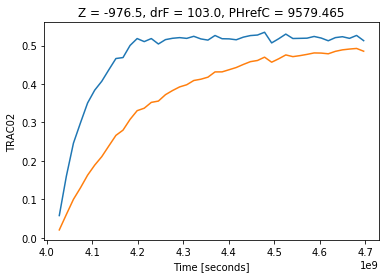

In [25]:
ds_tracers.TRAC01.sel(Z=-1000, method='nearest').sel(XC=slice(0,200e3), YC=slice(900e3,1100e3)).mean(['XC','YC']).plot()
ds_tracers.TRAC02.sel(Z=-1000, method='nearest').sel(XC=slice(0,200e3), YC=slice(900e3,1100e3)).mean(['XC','YC']).plot()

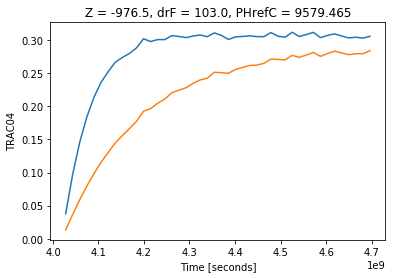

In [26]:
ds_tracers.TRAC03.sel(Z=-1000, method='nearest').sel(XC=slice(0,200e3), YC=slice(900e3,1100e3)).mean(['XC','YC']).plot()
ds_tracers.TRAC04.sel(Z=-1000, method='nearest').sel(XC=slice(0,200e3), YC=slice(900e3,1100e3)).mean(['XC','YC']).plot()

In [6]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']

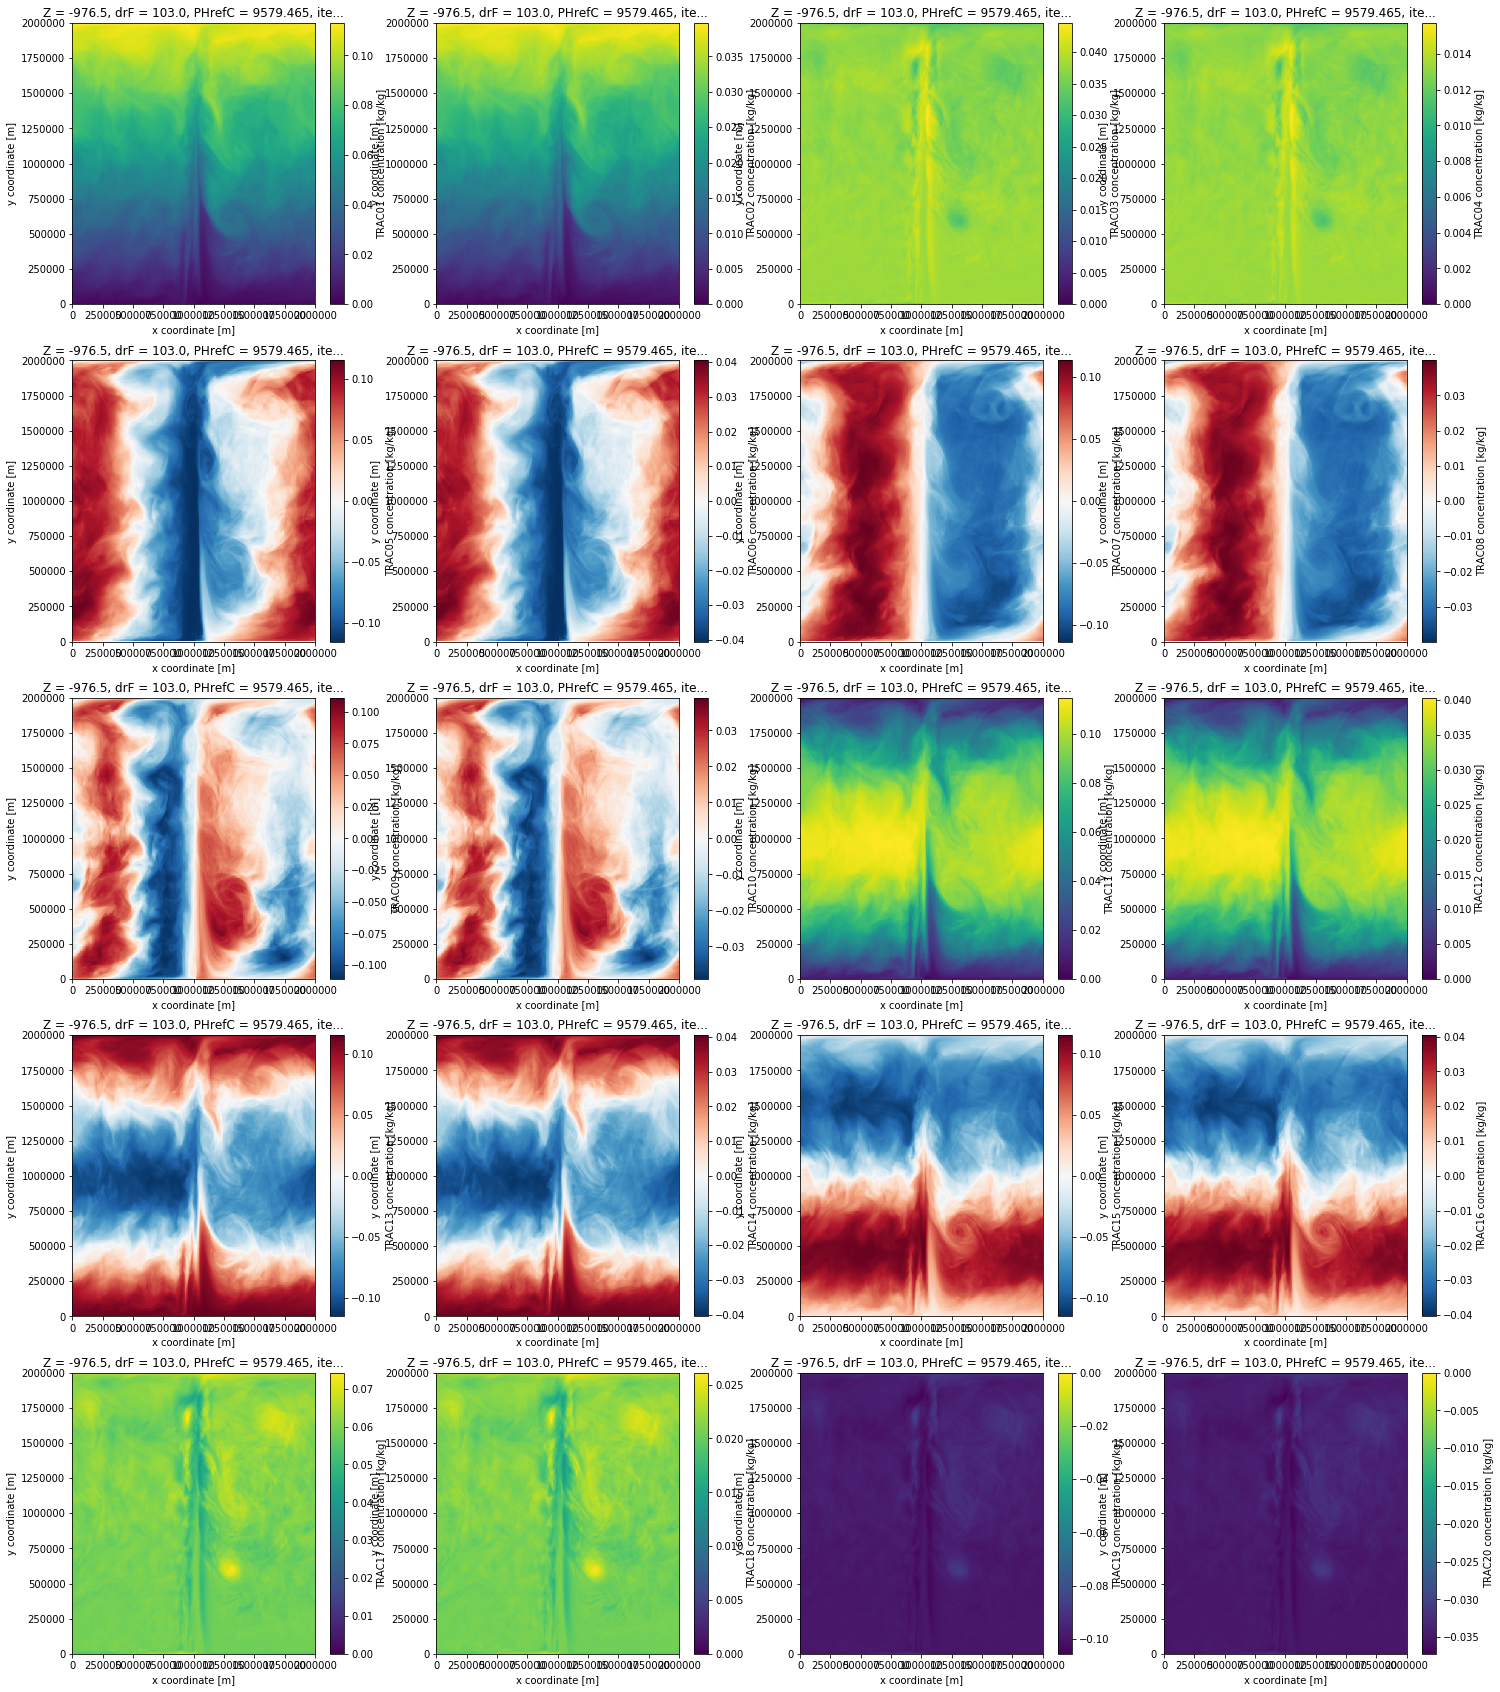

In [20]:
plt.figure(figsize=(25,30))
n=1
for i in list_trac:
    plt.subplot(5,4,n)
    n+=1
    ds_tracers[i].sel(Z=-1000,method='nearest').isel(time=0).plot()

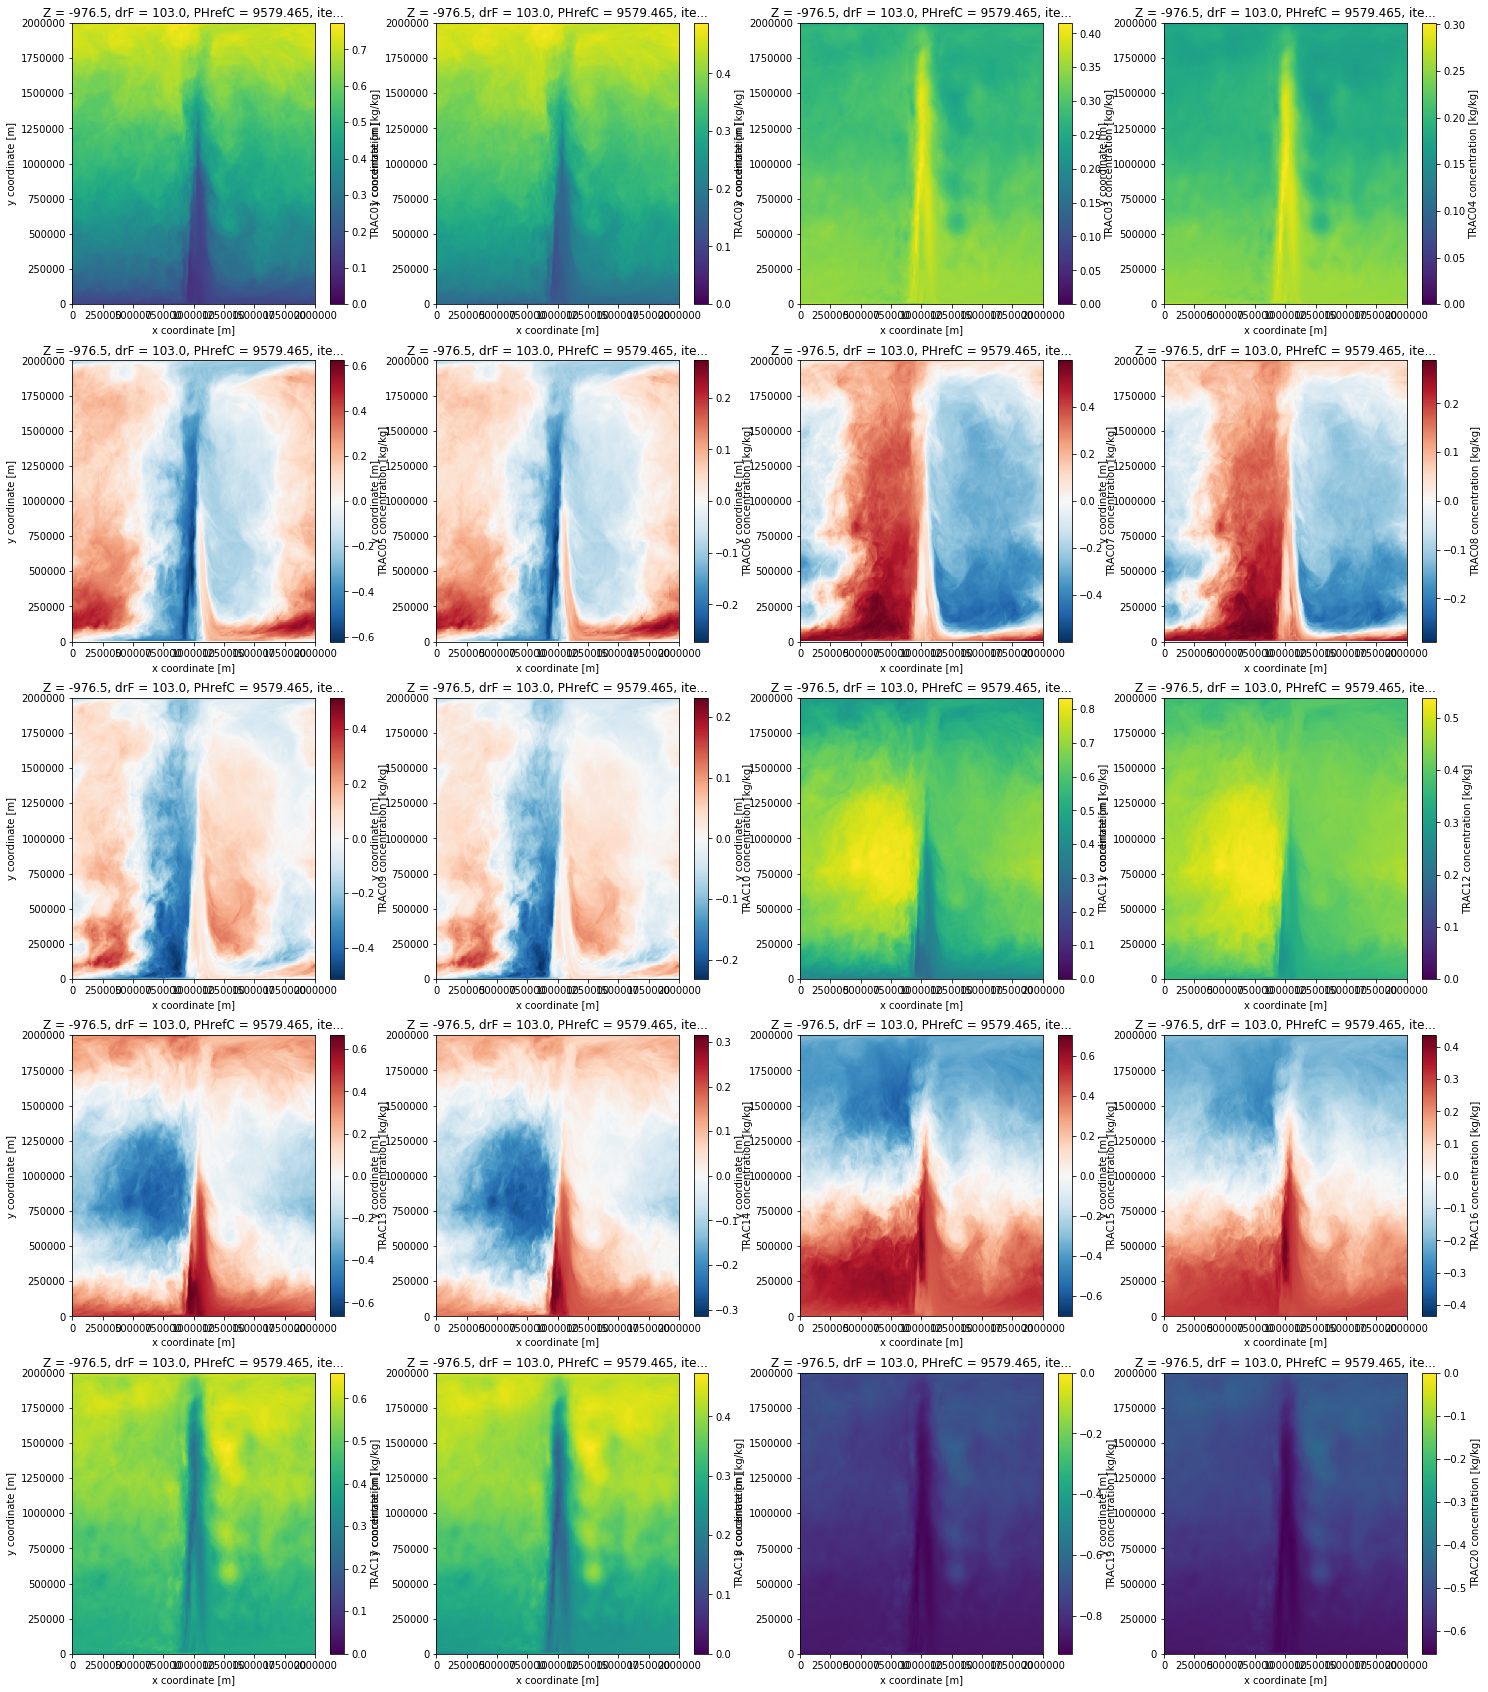

In [21]:
plt.figure(figsize=(25,30))
n=1
for i in list_trac:
    plt.subplot(5,4,n)
    n+=1
    ds_tracers[i].sel(Z=-1000,method='nearest').isel(time=-1).plot()

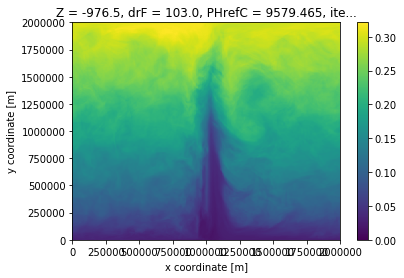

In [11]:
(ds_tracers.TRAC01 - ds_tracers.TRAC02).isel(time=-1).sel(Z=-1000, method='nearest').plot()

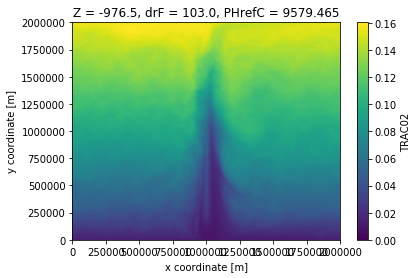

In [13]:

ds_tracers.TRAC02.mean('time').sel(Z=-1000, method='nearest').plot()

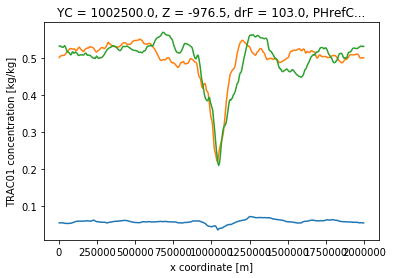

In [7]:
ds_tracers.TRAC01.isel(time=0).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC01.isel(time=20).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC01.isel(time=-1).sel(YC=1000e3,Z=-1000, method='nearest').plot()

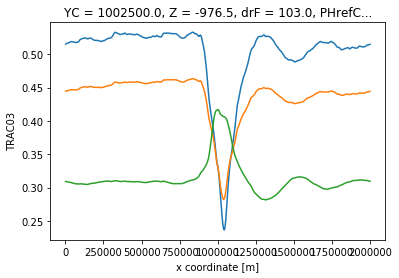

In [8]:
ds_tracers.TRAC01.isel(time=slice(20,55)).sel(YC=1000e3,Z=-1000, method='nearest').mean('time').plot()
ds_tracers.TRAC02.isel(time=slice(20,55)).sel(YC=1000e3,Z=-1000, method='nearest').mean('time').plot()
ds_tracers.TRAC03.isel(time=slice(20,55)).sel(YC=1000e3,Z=-1000, method='nearest').mean('time').plot()


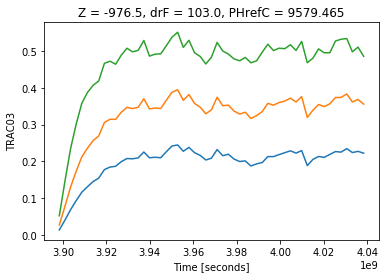

In [21]:
ds_tracers.TRAC01.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()
ds_tracers.TRAC02.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()
ds_tracers.TRAC03.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()

In [ ]:
ds_tracers.TRAC01.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()

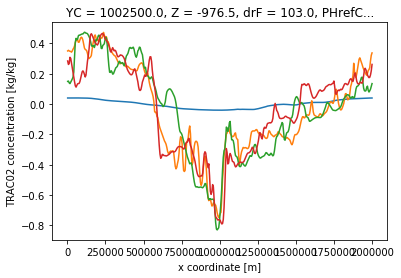

In [15]:
ds_tracers.TRAC02.isel(time=0).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC02.isel(time=20).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC02.isel(time=40).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC02.isel(time=-1).sel(YC=1000e3,Z=-1000, method='nearest').plot()

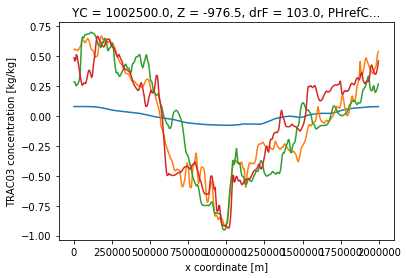

In [17]:
ds_tracers.TRAC03.isel(time=0).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=20).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=40).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=-1).sel(YC=1000e3,Z=-1000, method='nearest').plot()

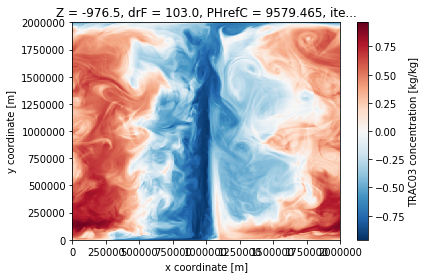

In [6]:
ds_tracers.TRAC03.isel(time=-1).sel(Z=-1000, method='nearest').plot()

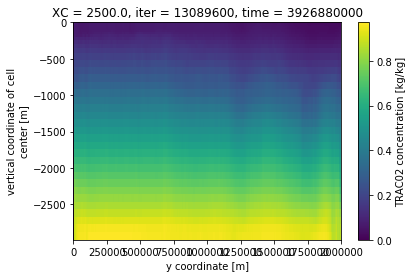

In [8]:
ds_tracers.TRAC02.isel(time=-1).sel(XC=0, method='nearest').plot()

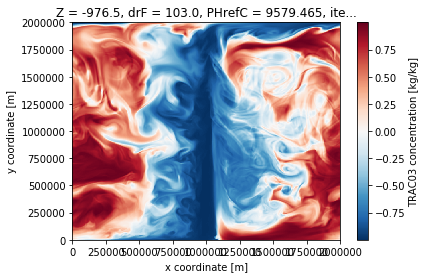

In [17]:
ds_tracers.TRAC03.isel(time=).sel(Z=-1000, method='nearest').plot()

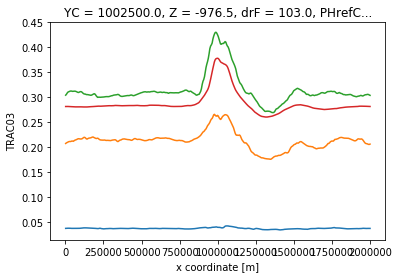

In [27]:
ds_tracers.TRAC03.isel(time=0).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=4).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=-1).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.mean('time').sel(YC=1000e3, Z=-1000, method='nearest').plot()

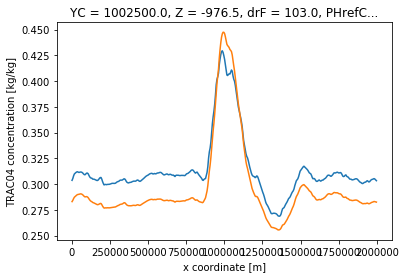

In [28]:
ds_tracers.TRAC03.isel(time=-1).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC04.isel(time=-1).sel(YC=1000e3, Z=-1000, method='nearest').plot()